In [1]:
import numpy as np
from numpy import genfromtxt, savetxt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import  PCA
import sklearn
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits import mplot3d
import matplotlib.patches as mpatches

import pandas as pd

import scipy.linalg as la

from tkinter import *

class schnet_analyzer:
    def __init__(self,element,file_path,label,data):
        self.element = element
        self.file_path = file_path
        self.label = label
        self.data = data
        
    def colors(self):
        #hydrogen
        methyl = mpatches.Patch(color='palegreen', label='methyl')
        methylene = mpatches.Patch(color='green', label='methylene')
        methine = mpatches.Patch(color='lime',label='methine')
        alkene = mpatches.Patch(color='tan',label='alkene')
        primaryamine = mpatches.Patch(color='tomato',label='primary-amine')
        secondaryamine = mpatches.Patch(color='chocolate',label='secondary-amine')
        alcohols = mpatches.Patch(color='teal',label='alcohols')
        methylO = mpatches.Patch(color='gold',label='methyl-O')
        methylN = mpatches.Patch(color='pink',label='methyl-N')
        methyleneN = mpatches.Patch(color='orange',label='methylene-N')
        methyleneO = mpatches.Patch(color='blue',label='methylene-O')
        methineN = mpatches.Patch(color='cyan',label='methine-N')
        methineO = mpatches.Patch(color='grey',label='methine-O')
        alkeneO = mpatches.Patch(color='lightsteelblue',label='alkene-O')
        alkeneN = mpatches.Patch(color='navy',label='alkene-N')
        HCOO = mpatches.Patch(color='violet',label='H-COO')
        HCON = mpatches.Patch(color='palegreen',label = 'H-CON')
        ammonium = mpatches.Patch(color='purple',label='H3N+-C')
        imine = mpatches.Patch(color='indigo',label='H-N=C')
        
        
        #oxygen
        aldehyde = mpatches.Patch(color='violet', label='aldehyde')
        terminalamide = mpatches.Patch(color='lightgreen', label='terminal-amide')
        terminalester = mpatches.Patch(color='gold',label='terminal-ester')
        internalester = mpatches.Patch(color='pink',label='internal-ester')
        ketone = mpatches.Patch(color='purple',label='ketone')
        internalamide = mpatches.Patch(color='green',label='internal-amide')
        urea = mpatches.Patch(color='darkgreen',label='urea')
        amideester = mpatches.Patch(color='darkseagreen',label='amide-ester')
        primaryalcohol = mpatches.Patch(color='red',label='primary-alcohol')
        secondaryalcohol = mpatches.Patch(color='indianred',label='secondary-alcohol')
        tertiaryalcohol = mpatches.Patch(color='maroon',label='tertiary-alcohol')
        ether = mpatches.Patch(color='orange',label='ether')
        alcoholamine = mpatches.Patch(color='rosybrown',label='alcohol-amine')
        hemiacetal = mpatches.Patch(color='black',label='hemiacetal')
        alcoholalkene = mpatches.Patch(color='skyblue',label='alcohol-akene')
        if element == 'O':
            colors=['tomato','violet','lightgreen','gold','pink',
                'purple','green','darkgreen','brown','lime',
                'cyan','grey','red','indianred','maroon',
                'navy','violet','cornflowerblue','palegreen','lightsalmon',
                'sandybrown','skyblue','lavender','chocolate','black',
                'firebrick','antiquewhite','indigo','teal','bisque',
                'olive','sandybrown','orange','darkseagreen','rosybrown','grey']
            ax1.legend(bbox_to_anchor=(1.5, 1.0),handles=[aldehyde,terminalamide,
                                                         terminalester,internalester,
                                                         ketone,internalamide,
                                                         urea,amideester,primaryalcohol,
                                                         secondaryalcohol,tertiaryalcohol,
                                                         ether,alcoholamine,
                                                         hemiacetal,alcoholalkene])
        if element == 'H':
            colors=['purple','none','palegreen','pink','lightblue',
                'mediumseagreen','lightskyblue','lightcoral','none','darkseagreen',
                'cornflowerblue','indianred','none','yellowgreen','palevioletred',
                'aquamarine','none','steelblue','mediumvioletred','none',
                'darkolivegreen','none','none','khaki','hotpink',
                'navajowhite','none','none','thistle','darksalmon',
                'tomato','none','burlywood']
            ax1.legend(bbox_to_anchor=(1.5, 1.0),handles=[methyl,methylene,
                                                         methine,alkene,
                                                         primaryamine,secondaryamine,
                                                         alcohols,methylO,methylN,
                                                         methyleneN,methyleneO,methineN,methineO,
                                                         alkeneO,alkeneN,HCOO,HCON,ammonium,imine])
        #NO ZERO SO FAR, 5000
        #THERE IS ONE ZERO, 10000
        if element == 'N':
            colors=['none','none','none','palegreen','khaki',
                    'none','mediumaquamarine','mediumseagreen','none','orange',
                    'darkseagreen','none','none','none','none',
                    'lightskyblue', 'steelblue','lightcoral','none','none',
                    'tomato','plum','purple','hotpink']

        if element == 'C':
            colors=['black','none','#ccffcc','#ccffff','#ffcccc',
                '#99ff66','none','none','#66ffff','#ff9999',
                '#77b300','#33cccc','#ff6666','none','#666633',
                '#cc0000','none','none','none','none',
                'none','#ffffcc','#ffcc99','#66ccff','#ccccff',
                'none','#00cc66','#009999','#ff9933','#0099ff',
                '#9999ff','black','#00ff99','#006666','black',
                'none','#99ccff', '#3333cc', '#ff6600','none',
                'blue','none','none','black','black',
                'black','none']
        return colors
        
    def pca_analysis(self,data):
        #scale data (if necessary)
        if scale_data == True:
            scaler = StandardScaler()
            scaler.fit(data)
            data = scaler.transform(data)
        #perform PCA decomposition of the data
        pca = PCA(n_components)
        pca.fit(data)
        x_pca = pca.transform(data)
        
        cov = pca.get_covariance()
        eig, ev = la.eig(cov)
        total = sum(eig.real)
        print(eig)
        #plot the PCA if dimension 2 or 3, if element H or O for colors/legend
        x=x_pca
        savetxt('../../../../data/regression_charges/pcah.csv', x, delimiter=',')
        evt=np.transpose(ev)
        unit=np.matmul(ev,evt)
        return x
        
    def tsne_analysis(self,data,dimension,perp):
        #Implementing the TSNE Function - ah Scikit learn makes it so easy!
        x = TSNE(n_components=dimension,perplexity=perp).fit_transform(data)
        if dimension == 2:
            color = schnet_analyzer.colors(element)
            ax4.scatter(x[:,0],x[:,1],x[:,2],c=label['Target'],cmap=matplotlib.colors.ListedColormap(color))
        if dimension == 3:
            color = schnet_analyzer.colors(element)
            ax4.scatter(x[:,0],x[:,1],x[:,2],c=label['Target'],cmap=matplotlib.colors.ListedColormap(color))
            




[8.3773867 +0.j 5.61297248+0.j 3.06397681+0.j 1.80931369+0.j
 1.45764335+0.j 1.40562602+0.j 1.19334007+0.j 1.00703179+0.j
 0.93115068+0.j 0.65252321+0.j 0.61867413+0.j 0.57638176+0.j
 0.43338363+0.j 0.39291071+0.j 0.38591427+0.j 0.29822557+0.j
 0.28689926+0.j 0.23639871+0.j 0.02165625+0.j 0.03605776+0.j
 0.0414876 +0.j 0.0550161 +0.j 0.06696234+0.j 0.20521473+0.j
 0.18444024+0.j 0.16220252+0.j 0.14529155+0.j 0.09880316+0.j
 0.11936156+0.j 0.12458108+0.j]


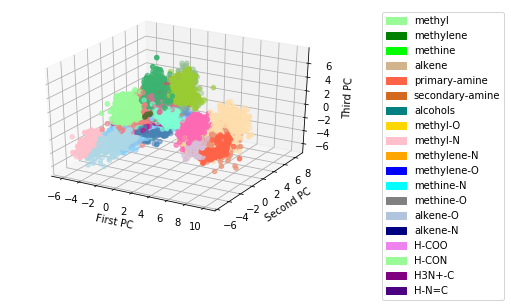

In [2]:
element = 'H' 
file_path = '../../../../data/pca-tsne/qm9_i3_30f_10000_5000/fullytrained/5000-test-points/article/dataH.csv'  
label_path = '../../../../data/pca-tsne/qm9_i3_30f_10000_5000/fullytrained/5000-test-points/article/label%s.csv' %(element)
AE = genfromtxt('../../../../data/pca-tsne/qm9_i3_30f_10000_5000/fullytrained/5000-test-points/article/hae.csv', delimiter=',')
label = pd.read_csv(label_path,delimiter=',')
data = genfromtxt(file_path,delimiter=',')
scale_data = True
n_components = 30



ax1 = plt.axes(projection = '3d')
ax1.set_xlabel('First PC')
ax1.set_ylabel('Second PC')
ax1.set_zlabel('Third PC')
color = schnet_analyzer.colors(element)
analysis = schnet_analyzer(element,file_path,label,data)
x = schnet_analyzer.pca_analysis(element,data)
ax1.scatter(x[:,0],x[:,1],x[:,2],c=label['Target'],cmap=matplotlib.colors.ListedColormap(color))
#ax1.view_init(35,90)

    

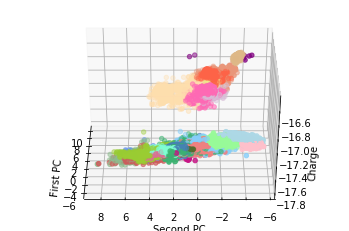

In [3]:

fig3 = plt.subplots()
ax3 = plt.axes(projection='3d')
ax3.set_xlabel('First PC')
ax3.set_ylabel('Second PC')
ax3.set_zlabel('Charge')
ax3.view_init(35,180)
ax3.scatter(x[:,0],x[:,1],AE,c=label['Target'],cmap=matplotlib.colors.ListedColormap(color))
color = schnet_analyzer.colors(element)


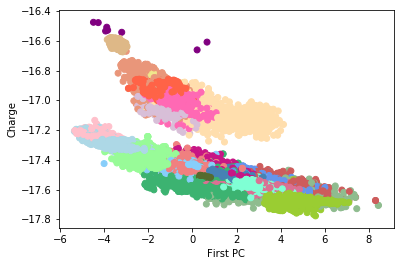

In [4]:
fig2, ax2 = plt.subplots()
ax2.set_xlabel('First PC')
#ax2.set_ylim([-18,-16])
ax2.set_ylabel('Charge')
ax2.scatter(x[:,1],AE,c=label['Target'],cmap=matplotlib.colors.ListedColormap(color))



In [5]:

perp = 100
dimension=2

X = TSNE(n_components=dimension,perplexity=perp).fit_transform(data)


In [19]:
from pylab import *
import matplotlib.pyplot as plt
import matplotlib.lines
from matplotlib.transforms import Bbox, TransformedBbox
from matplotlib.legend_handler import HandlerBase
from matplotlib.image import BboxImage

class HandlerLineImage(HandlerBase):

    def __init__(self, path, space=0, offset = 0 ):
        self.space=space
        self.offset=offset
        self.image_data = plt.imread(path)        
        super(HandlerLineImage, self).__init__()

    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):

        l = matplotlib.lines.Line2D([xdescent+self.offset,xdescent+(width-self.space)/3.+self.offset],
                                     [ydescent+height/2., ydescent+height/2.])
        l.update_from(orig_handle)
        l.set_clip_on(False)
        l.set_transform(trans)

        bb = Bbox.from_bounds(xdescent +(width+self.space)/3.+self.offset,
                              ydescent,
                              height*self.image_data.shape[1]/self.image_data.shape[0],
                              height)

        tbb = TransformedBbox(bb, trans)
        image = BboxImage(tbb)
        image.set_data(self.image_data)

        self.update_prop(image, orig_handle, legend)
        return [l,image]

    
fig4,ax4 = plt.subplots(figsize=(6,10),dpi=1000,nrows=2,ncols=1)

ax4[1].set_xlabel('t-SNE1')
ax4[1].set_ylabel('t-SNE2')

        

if dimension == 2:
    color = schnet_analyzer.colors(element)
    ax4[1].scatter(X[:,0],X[:,1],c=label['Target'],cmap=matplotlib.colors.ListedColormap(color))
if dimension == 3:
    color = schnet_analyzer.colors(element)
    ax4[1].scatter(X[:,0],X[:,1],X[:,2],c=label['Target'],cmap=matplotlib.colors.ListedColormap(color))

ax4[0].set_xlabel('First PC')
ax4[0].set_ylabel('Second PC')
ax4[0].scatter(x[:,0],x[:,1],c=label['Target'],cmap=matplotlib.colors.ListedColormap(color))
    
    
line1,  = plt.plot(0,0, color='palegreen', lw=10)
line2,  = plt.plot(0,0, color='mediumseagreen', lw=10)  
line3, = plt.plot(0,0, color='darkseagreen', lw=10)  
line4, = plt.plot(0,0, color='yellowgreen', lw=10)  
line5, = plt.plot(0,0, color='darkolivegreen', lw=10)  
line6, = plt.plot(0,0, color='pink', lw=10)  
line7, = plt.plot(0,0, color='lightcoral', lw=10)  
line8, = plt.plot(0,0, color='indianred', lw=10)  
line9, = plt.plot(0,0, color='palevioletred', lw=10)  
line10, = plt.plot(0,0, color='mediumvioletred', lw=10)  
line11, = plt.plot(0,0, color='lightblue', lw=10)  
line12, = plt.plot(0,0, color='lightskyblue', lw=10)  
line13, = plt.plot(0,0, color='cornflowerblue', lw=10)  
line14, = plt.plot(0,0, color='aquamarine', lw=10)  
line15, = plt.plot(0,0, color='steelblue', lw=10)  
line16, = plt.plot(0,0, color='khaki', lw=10)  
line17, = plt.plot(0,0, color='hotpink', lw=10)  
line18, = plt.plot(0,0, color='navajowhite', lw=10)  
line19, = plt.plot(0,0, color='thistle', lw=10)  
line20, = plt.plot(0,0, color='darksalmon', lw=10)  
line21, = plt.plot(0,0, color='tomato', lw=10)  
line22, = plt.plot(0,0, color='burlywood', lw=10)  


l1 = ax4[1].legend([line12,line13,line14,line15,line16,line17,line18,line19,line20,line21,line22], ["","","","","","","","","","",""],
   handler_map={ line1: HandlerLineImage("./hydro_CH3-C.png"), line2: HandlerLineImage("./hydro_CH2-CC.png"),
                line3: HandlerLineImage("./hydro_CH-CCC.png"), line4: HandlerLineImage("./hydro_CH-CC.png"),
                line5: HandlerLineImage("./hydro_CH-C.png"),   line6: HandlerLineImage("./hydro_CH3-O.png"),
                line7: HandlerLineImage("./hydro_CH2-CO.png"), line8: HandlerLineImage("./hydro_CH-CCO.png"),
                line9: HandlerLineImage("./hydro_CH-CO.png"), line10: HandlerLineImage("./hydro_CH-NO.png"),
                line11: HandlerLineImage("./hydro_CH3-N.png"), line12: HandlerLineImage("./hydro_CH2-CN.png"),
                line13: HandlerLineImage("./hydro_CH-CCN.png"), line14: HandlerLineImage("./hydro_CH-CN.png"),
                line15: HandlerLineImage("./hydro_CH-NN.png"), line16: HandlerLineImage("./hydro_NH2-C4.png"),
                line17: HandlerLineImage("./hydro_NH2-C3.png"), line18: HandlerLineImage("./hydro_NH-CC.png"),
                line19: HandlerLineImage("./hydro_NH-C.png"),  line20: HandlerLineImage("./hydro_OH-C4.png"),
                line21: HandlerLineImage("./hydro_OH-C3.png"), line22: HandlerLineImage("./hydro_OH-N.png")},
   handlelength=2, labelspacing=0.0, fontsize=36, borderpad=0.15, loc=3, 
    handletextpad=0.2, borderaxespad=0.15,bbox_to_anchor=(1.5, -0.1),prop={'size': 50})

l2 = ax4[0].legend([line1, line2,line3,line4,line5,line6,line7,line8,line9,line10,line11], ["","","","","","","","","","",""],
   handler_map={ line1: HandlerLineImage("./hydro_CH3-C.png"), line2: HandlerLineImage("./hydro_CH2-CC.png"),
                line3: HandlerLineImage("./hydro_CH-CCC.png"), line4: HandlerLineImage("./hydro_CH-CC.png"),
                line5: HandlerLineImage("./hydro_CH-C.png"),   line6: HandlerLineImage("./hydro_CH3-O.png"),
                line7: HandlerLineImage("./hydro_CH2-CO.png"), line8: HandlerLineImage("./hydro_CH-CCO.png"),
                line9: HandlerLineImage("./hydro_CH-CO.png"), line10: HandlerLineImage("./hydro_CH-NO.png"),
                line11: HandlerLineImage("./hydro_CH3-N.png"), line12: HandlerLineImage("./hydro_CH2-CN.png"),
                line13: HandlerLineImage("./hydro_CH-CCN.png"), line14: HandlerLineImage("./hydro_CH-CN.png"),
                line15: HandlerLineImage("./hydro_CH-NN.png"), line16: HandlerLineImage("./hydro_NH2-C4.png"),
                line17: HandlerLineImage("./hydro_NH2-C3.png"), line18: HandlerLineImage("./hydro_NH-CC.png"),
                line19: HandlerLineImage("./hydro_NH-C.png"),  line20: HandlerLineImage("./hydro_OH-C4.png"),
                line21: HandlerLineImage("./hydro_OH-C3.png"), line22: HandlerLineImage("./hydro_OH-N.png")},
   handlelength=2, labelspacing=0.0, fontsize=36, borderpad=0.15, loc=3, 
    handletextpad=0.2, borderaxespad=0.15,bbox_to_anchor=(1.0, -1.3),prop={'size': 50})

plt.show()
